In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


# **Langchain Memory**


*   LLM Applications have conversational interface
*   Important feature is to remember the previous conversations


## Memory Actions


*   read from memory
*   write to memory





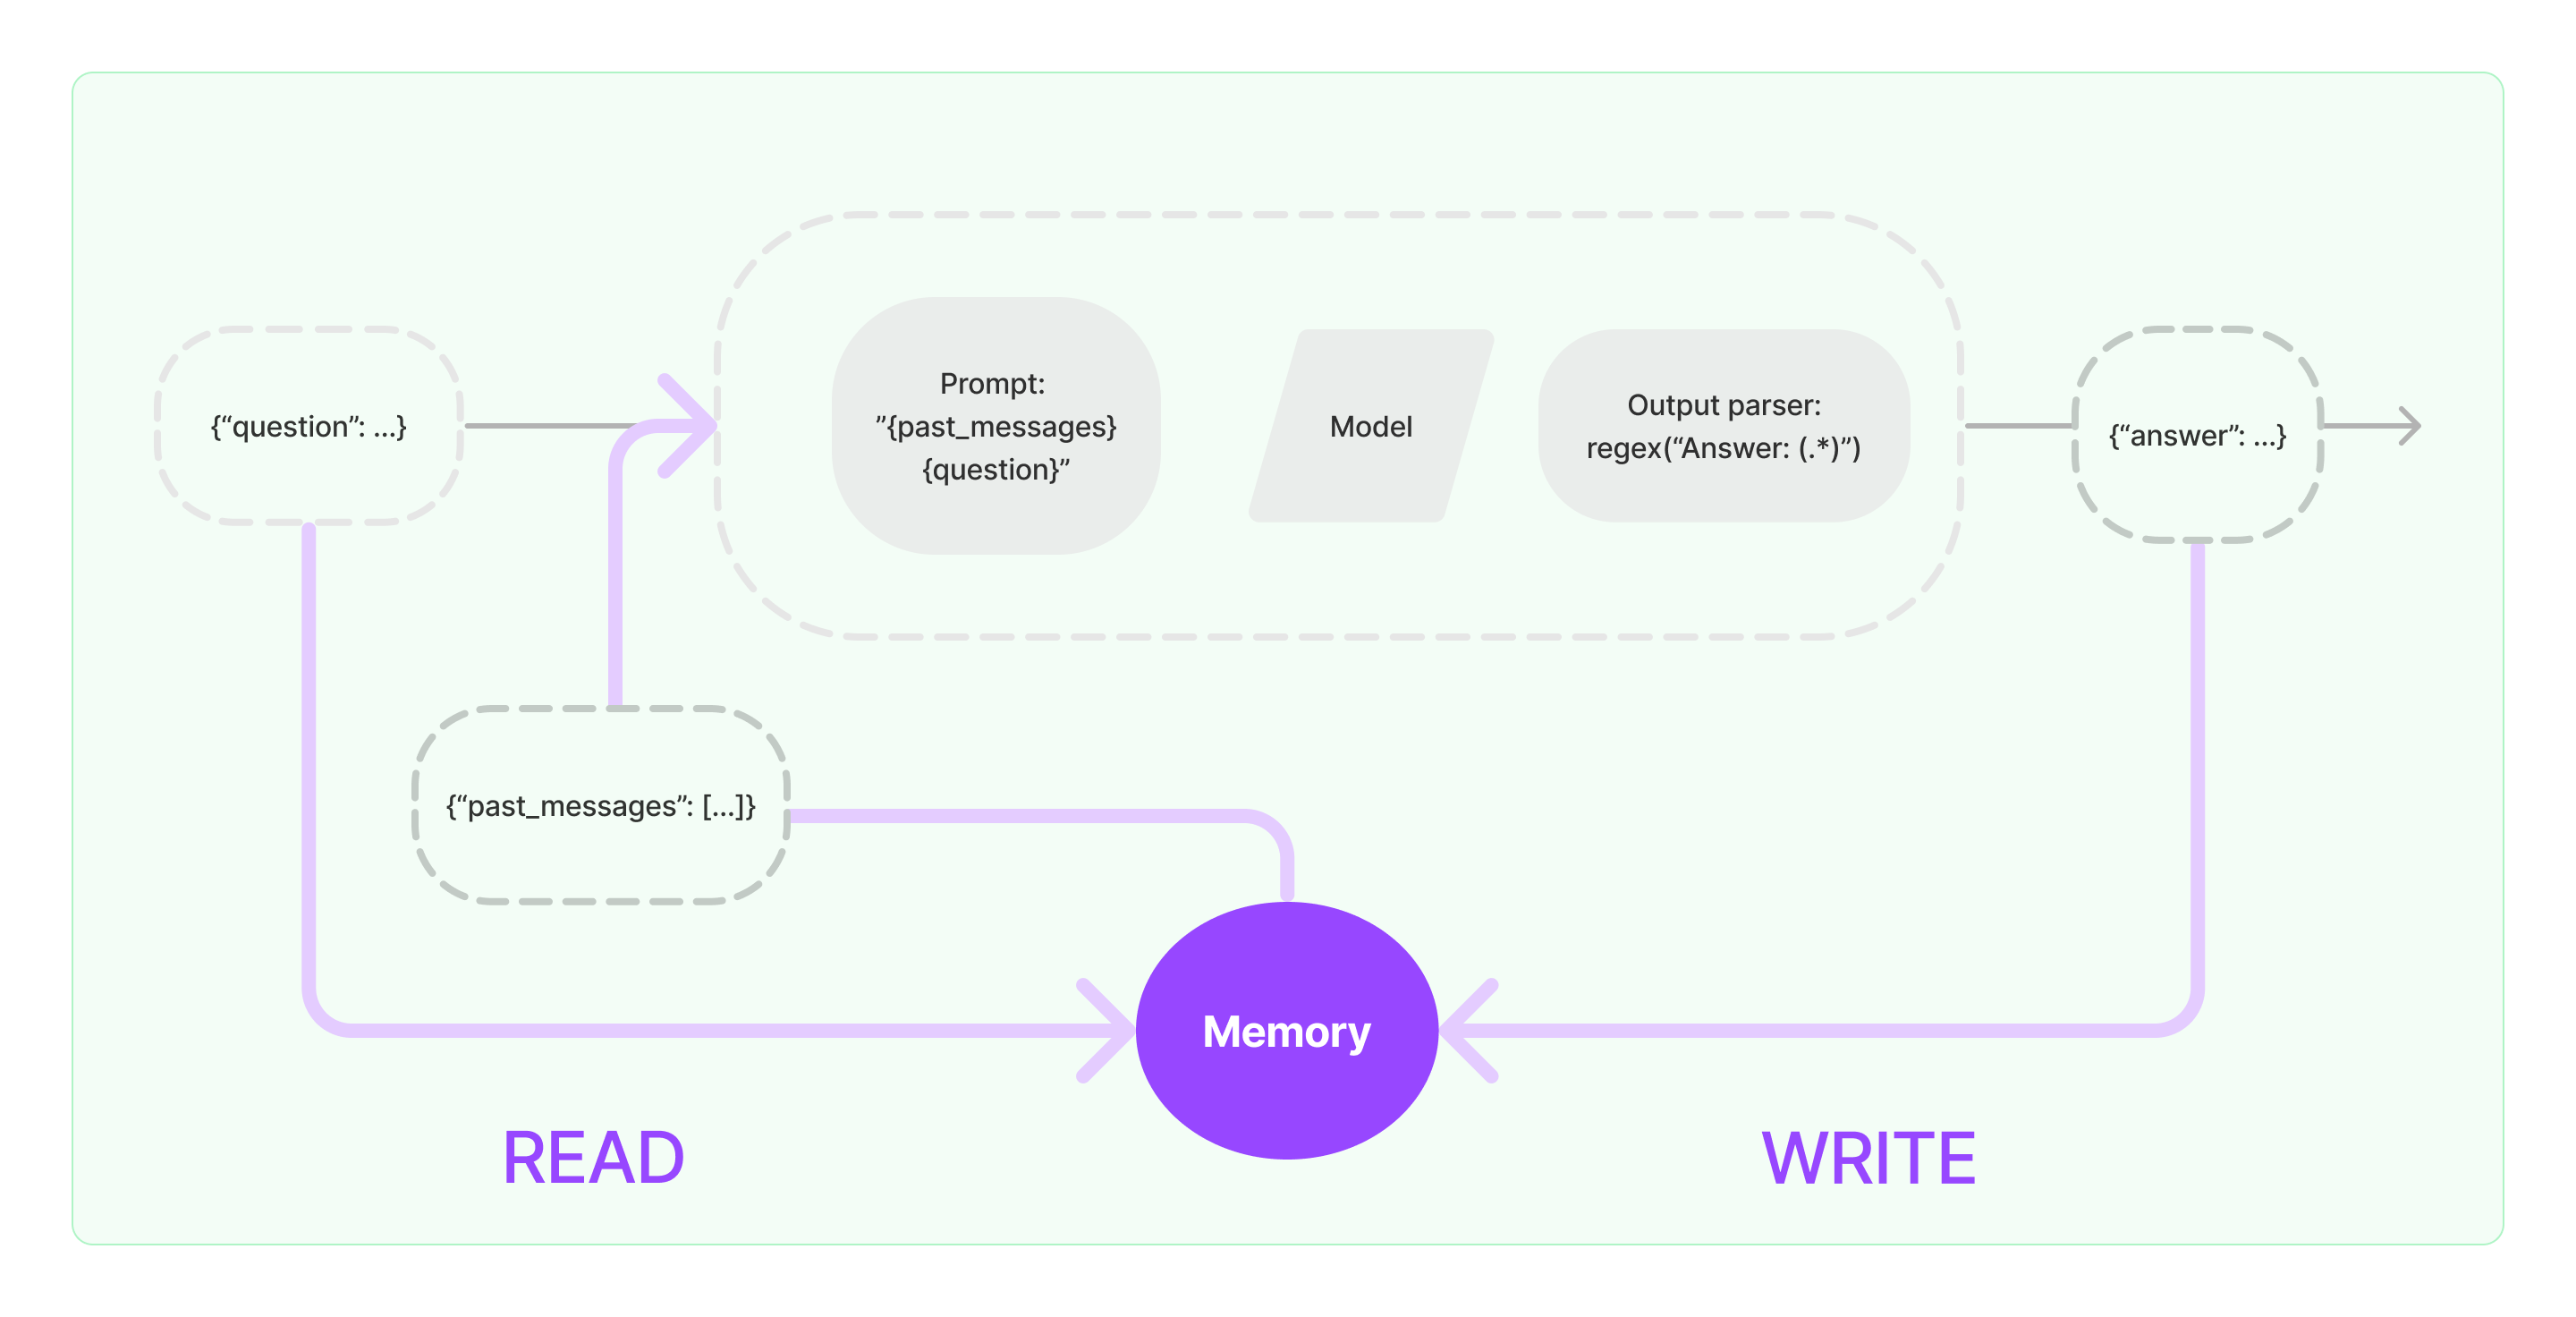

## Memory Types


*   ConversationBufferMemory
*   ConversationBufferWindowMemory
*   Entity Memory
*   Conversation Knowledge Graph Memory
*   ConversationSummary Memory
*   ConversationSummaryBufferMemory
*   ConversationTokenBufferMemory
*   Vectorstore backend Memory



### ConversationBufferMemory

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.chat_memory.add_user_message("hi")
memory.chat_memory.add_ai_message("whats up?")

In [ ]:
memory.load_memory_variables({})

{'history': 'Human: hi\nAI: whats up?'}

In [ ]:
memory.chat_memory.add_user_message("Give me a fruit name?")

In [ ]:
memory.load_memory_variables({})

{'history': 'Human: hi\nAI: whats up?\nHuman: Give me a fruit name?'}

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import sys
sys.path.append("/content/drive/MyDrive")

In [ ]:
from constant_keys import *

In [ ]:

import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY # Replace with your key

In [ ]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory

In [ ]:
llm = OpenAI(temperature=0)

In [ ]:
template = """You are a nice chatbot having a conversation with a human.

Previous conversation:
{chat_history}

New human question: {question}
Response:"""

In [ ]:
prompt = PromptTemplate.from_template(template)


In [ ]:
memory = ConversationBufferMemory(memory_key="chat_history")

In [ ]:
conversation = LLMChain( llm = llm, prompt=prompt, verbose=True, memory=memory)

In [ ]:
conversation({"question": "hi"})



> Entering new LLMChain chain...
Prompt after formatting:
You are a nice chatbot having a conversation with a human.

Previous conversation:


New human question: hi
Response:

> Finished chain.


{'question': 'hi',
 'chat_history': '',
 'text': ' Hi there! How can I help you?'}

In [ ]:
conversation({"question": "what is your name"})



> Entering new LLMChain chain...
Prompt after formatting:
You are a nice chatbot having a conversation with a human.

Previous conversation:
Human: hi
AI:  Hi there! How can I help you?

New human question: what is your name
Response:

> Finished chain.


{'question': 'what is your name',
 'chat_history': 'Human: hi\nAI:  Hi there! How can I help you?',
 'text': " My name is AI Chatbot. It's nice to meet you!"}

In [ ]:
conversation({"question": "Name 5 best football playes"})



> Entering new LLMChain chain...
Prompt after formatting:
You are a nice chatbot having a conversation with a human.

Previous conversation:
Human: hi
AI:  Hi there! How can I help you?
Human: what is your name
AI:  My name is AI Chatbot. It's nice to meet you!
Human: Name 5 best football palyes
AI: 
That's a tough one! The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.

New human question: Name 5 best football playes
Response:

> Finished chain.


{'question': 'Name 5 best football playes',
 'chat_history': "Human: hi\nAI:  Hi there! How can I help you?\nHuman: what is your name\nAI:  My name is AI Chatbot. It's nice to meet you!\nHuman: Name 5 best football palyes\nAI: \nThat's a tough one! The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.",
 'text': ' The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.'}

In [ ]:
conversation({"question": "who has more goals in the above"})



> Entering new LLMChain chain...
Prompt after formatting:
You are a nice chatbot having a conversation with a human.

Previous conversation:
Human: hi
AI:  Hi there! How can I help you?
Human: what is your name
AI:  My name is AI Chatbot. It's nice to meet you!
Human: Name 5 best football palyes
AI: 
That's a tough one! The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.
Human: Name 5 best football playes
AI:  The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.

New human question: who has more goals in the above
Response:

> Finished chain.


{'question': 'who has more goals in the above',
 'chat_history': "Human: hi\nAI:  Hi there! How can I help you?\nHuman: what is your name\nAI:  My name is AI Chatbot. It's nice to meet you!\nHuman: Name 5 best football palyes\nAI: \nThat's a tough one! The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.\nHuman: Name 5 best football playes\nAI:  The five best football players of all time are Lionel Messi, Cristiano Ronaldo, Diego Maradona, Pele, and Johan Cruyff.",
 'text': ' Lionel Messi has the most goals out of the five players listed, with 672 goals in his career. Cristiano Ronaldo is in second place with 656 goals.'}

SyntaxError: ignored

## Pros
*  Complete conversation history
*  Accurate references
*  Contextual understanding

## Cons
* Increased memory usage
* Potential performance impact
* Limited scalability